In [1]:
# Todo: sweet viz no final
# Testes estatísticos pra ver se as variáveis explicam o alvo e outros (teste de distribuição, normalidade)
# Criar pipeline pra essa ETL
# Separar ETAPAS de ETL, EDA e modelagem

# EDA (Exploratory Data Analysis)

## 1. Objetivo do notebook

Realizar análise exploratória dos dados respondendo as seguintes perguntas:

- Qual é o comportamento transacional do cliente (o que caracteriza as transações deste cliente)?

- Qual é o perfil das transações que retornaram chargeback?

Além disso, outras análises estatíticas de distribuições e relações

<u>Outputs</u>: PDF report e imagens em reports

## 2. Carregamento das bibliotecas e dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from viz_utils import plot_bar_line_same_x, boxplot_compare

c:\Users\Mototaxista\Desktop\Git projects\missao-data-science-stoneco\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('../data/processed/card_transactions_cbk_prepared.csv', dtype = {'flag_feriado': 'str',
                                                                                  'bandeira_cartao':'str',
                                                                                  'emissor_cartao': 'str'},
                                                                                  parse_dates=['Dia'])

In [4]:
df.dtypes

Dia                datetime64[ns]
Valor                     float64
Cartão                     object
CBK                         int64
periodo_do_dia             object
dia_da_semana              object
flag_feriado               object
bandeira_cartao            object
emissor_cartao             object
dtype: object

## 3. Análises por target (CBK)

### 3.1 Comportamento transacional do cliente/solicitante de chargeback

3.1.1 Por dia

In [5]:
daily_transactions = df.groupby('Dia').agg(
    total_transactions=('CBK', 'size'),
    total_chargebacks=('CBK', 'sum'),
    mean_transaction_value=('Valor', 'mean'),
    sum_transaction_value=('Valor', 'sum')
).reset_index()

daily_transactions['proportion_chargebacks'] = daily_transactions['total_chargebacks'] / daily_transactions['total_transactions']

daily_transactions.head(3)

,Dia,total_transactions,total_chargebacks,mean_transaction_value,sum_transaction_value,proportion_chargebacks
0,2015-05-01,170,14,139.591059,23730.48,0.082353
1,2015-05-02,106,12,164.679623,17456.04,0.113208
2,2015-05-03,127,1,135.538819,17213.43,0.007874


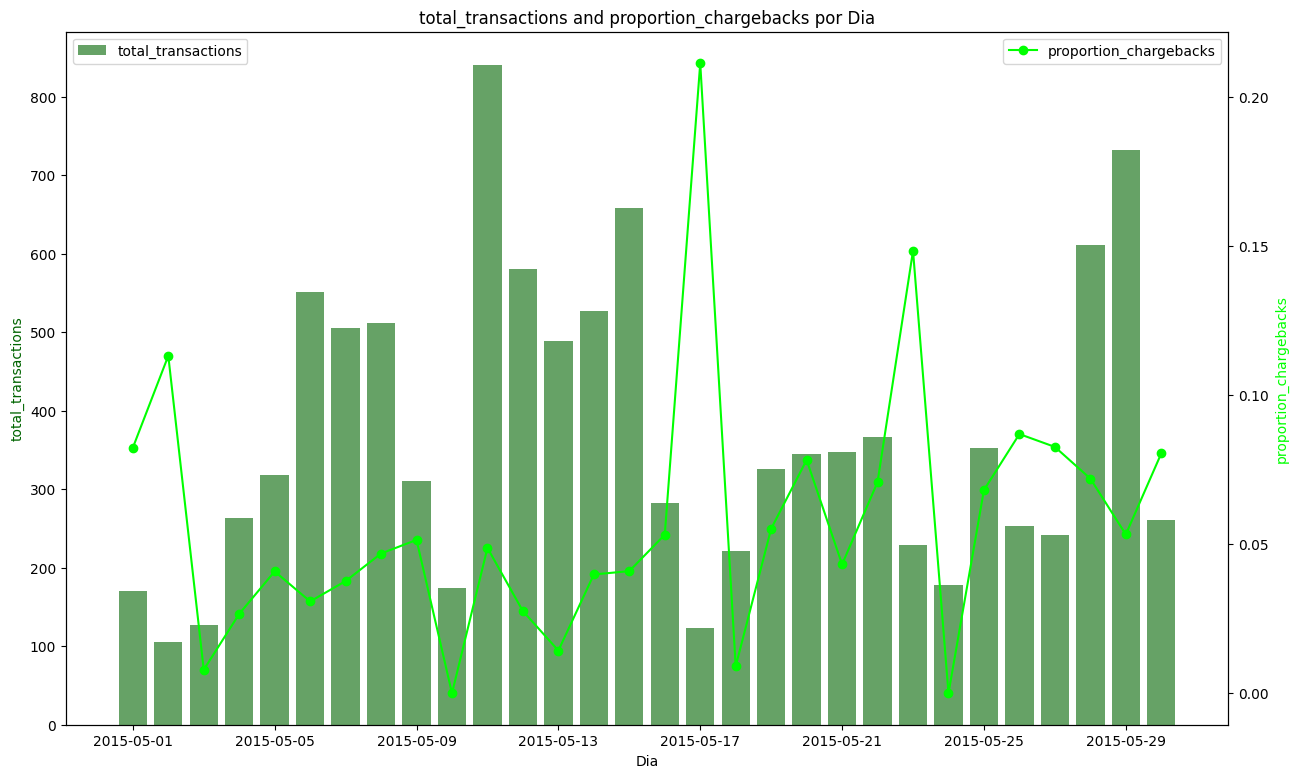

In [6]:
plot_bar_line_same_x(daily_transactions, x='Dia', y_bar='total_transactions', y_line='proportion_chargebacks', fig_size=(15,9))

Percebe-se que: nao necessariamente que o volume de chargebacks é proporcional ao volume de transacoes. Nao é possível concluir trends ou sazonalidade por nao ter mais dados de um mesmo período em anos diferentes ou diferentes temporadas no momento, mas seria um estudo a ser feito: 'é possivel concluir que ocorrem mais chargebacks no meio pro final do mës todos os meses?', otimizando a solucao para estes períodos

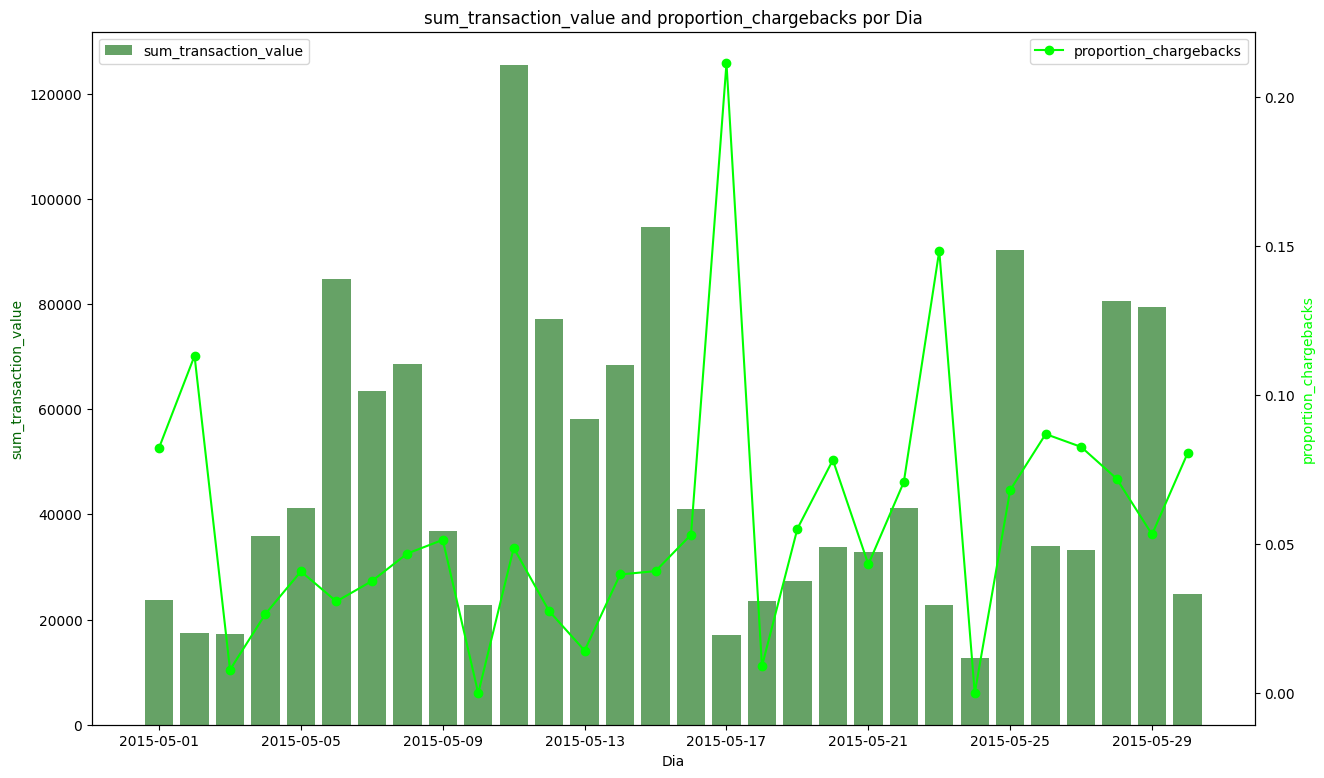

In [7]:
plot_bar_line_same_x(daily_transactions, x='Dia', y_bar='sum_transaction_value', y_line='proportion_chargebacks', fig_size=(15,9))

Em uma análise visual, a porcentagem de chargebacks no dia também nao parece ser correlato ao valor total de transacoes, podendo ver futuramente por ticket médio em uma analise mais profunda que capturasse outliers

3.1.2 Por valor

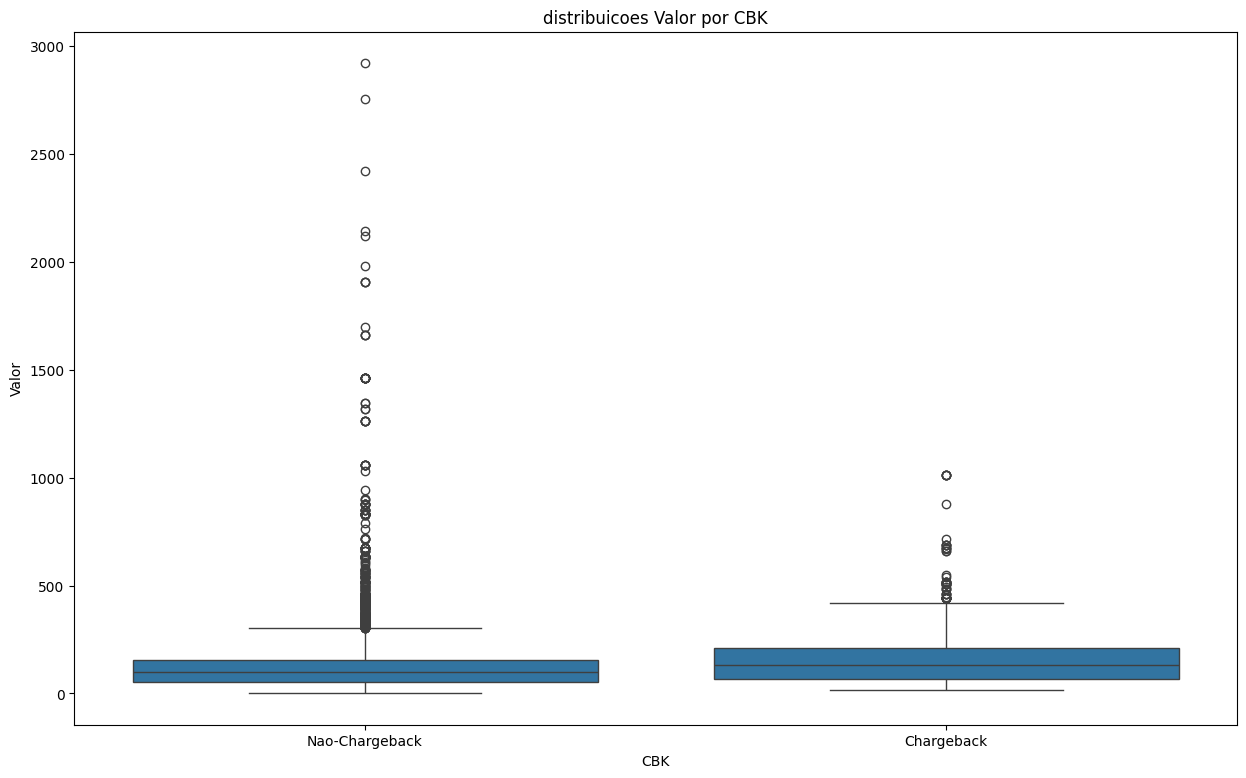

In [10]:
boxplot_compare(df, 'CBK', 'Valor', fig_size=(15,9))

Aparentemente o valor médio das transacoes neste período náo possui diferenca entre chargebacks e nao chargebacks, mas chargeback demonstrou ter valores mais baixos no geral e valores náo tao altos.

In [9]:
df.head()

,Dia,Valor,Cartão,CBK,periodo_do_dia,dia_da_semana,flag_feriado,bandeira_cartao,emissor_cartao
0,2015-05-01,36.54,536518******2108,0,madrugada,Sexta-feira,1,5,36518
1,2015-05-01,36.54,536518******2108,0,madrugada,Sexta-feira,1,5,36518
2,2015-05-01,69.00,453211******1239,0,madrugada,Sexta-feira,1,4,53211
3,2015-05-01,193.43,548827******1705,0,madrugada,Sexta-feira,1,5,48827
4,2015-05-01,132.00,531681******9778,0,madrugada,Sexta-feira,1,5,31681
